In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
from PIL import Image

# MNIST digit recognition using fastai computer vision

The images are stored in a csv file, so we first need to convert them into .jpg files in order to create the DataBunch

In [2]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [3]:
df_images = pd.read_csv('data/train.csv')

In [4]:
len(df_images)

42000

In [5]:
df_test = pd.read_csv('data/test.csv')

In [6]:
df_labels = pd.DataFrame()
df_labels['labels'] = df_images['label']
df_labels['name'] = [f'{str(i)}.jpg' for i in range(0, len(df_images))]

In [7]:
path = Path('data')

In [7]:
path_img = path/'images'
Path.mkdir(path_img)

FileExistsError: [Errno 17] File exists: 'data/images'

In [36]:
def df_to_images(df, path) :
    for i in range(0, len(df_images)) :
        array_to_img(df.iloc[i, 1:], path/f'{str(i)}.jpg')

        
def array_to_img(arr, path) :
    n = np.split(arr.to_numpy(), 28)
    n = np.asarray(n).astype(np.uint8)
    img = Image.fromarray(n)
    img.save(path)

In [37]:
df_to_images(df_images, path_img)

In [39]:
data = ImageDataBunch.from_df(path, df_labels, folder = 'images', label_col = 'labels', fn_col = 'name', bs = 32, ds_tfms = get_transforms(do_flip = False))

In [40]:
data.batch_stats()

[tensor([0.1247, 0.1247, 0.1247]), tensor([0.2923, 0.2923, 0.2923])]

In [41]:
data.normalize()

ImageDataBunch;

Train: LabelList
y: CategoryList (33600 items)
[Category 1, Category 0, Category 1, Category 4, Category 7]...
Path: data
x: ImageItemList (33600 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Valid: LabelList
y: CategoryList (8400 items)
[Category 1, Category 9, Category 8, Category 1, Category 9]...
Path: data
x: ImageItemList (8400 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Test: None

In [42]:
data.batch_stats()

[tensor([1.2377e-07, 1.2377e-07, 1.2377e-07]),
 tensor([1.0000, 1.0000, 1.0000])]

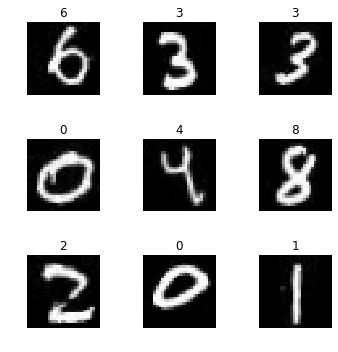

In [37]:
data.show_batch(rows = 3, figsize=(5,5))

In [260]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (33600 items)
[Category 1, Category 0, Category 1, Category 4, Category 0]...
Path: data
x: ImageItemList (33600 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Valid: LabelList
y: CategoryList (8400 items)
[Category 3, Category 4, Category 1, Category 0, Category 6]...
Path: data
x: ImageItemList (8400 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Test: None

In [261]:
def df_to_images2(df, path) :
    for i in range(0, len(df)) :
        array_to_img(df.iloc[i], path/f'{str(i)}.jpg')

        

In [56]:
data.one_batch()[0][0]

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.1423e-04,
          1.7261e-04, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.7507e-04,
          7.8522e-05, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.8656e-04,
          1.3001e-05, 0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [2.9729e-03, 0.0000e+00, 2.2518e-04,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.1423e-04,
          1.7261e-04, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.7507e-04,
          7.8522e-05, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.8656e-04,
          1.3001e-05, 0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.000

In [154]:
df_to_images2(df_test, Path('data/test_images'))

### Model 1 : convolutional neural network resnet34

In [49]:
learner = create_cnn(data, models.resnet34, metrics = error_rate)

In [263]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


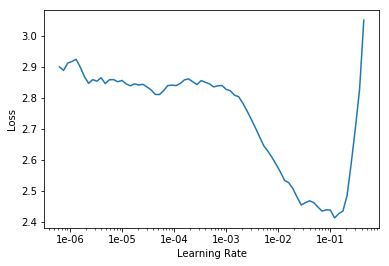

In [264]:
learner.recorder.plot()

In [51]:
type(learner.model)

torch.nn.modules.container.Sequential

In [266]:
learner.fit_one_cycle(20, slice(5e-3))

epoch,train_loss,valid_loss,error_rate
1,1.156408,0.920085,0.300238
2,0.835670,0.636591,0.209762
3,0.619134,0.410480,0.138810
4,0.418911,0.256845,0.083214
5,0.307589,0.169336,0.053452
6,0.274467,0.141843,0.045238
7,0.243598,0.115966,0.036905
8,0.213969,0.107946,0.034643
9,0.211363,0.109364,0.033333
10,0.172145,0.103282,0.030595


In [267]:
learner.save('stage1')

In [277]:
learner.unfreeze()

In [278]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


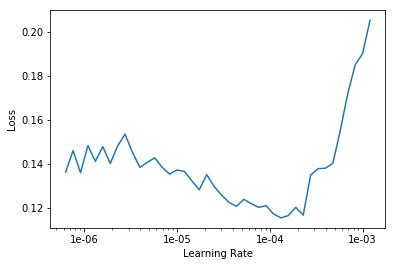

In [279]:
learner.recorder.plot()

In [281]:
learner.fit_one_cycle(20, slice(4e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.103644,0.070094,0.022857
2,0.112228,0.073649,0.023214
3,0.123001,0.079535,0.022976
4,0.094046,0.070233,0.022619
5,0.106806,0.060472,0.017738
6,0.080922,0.042260,0.012857
7,0.067837,0.043861,0.013571
8,0.054255,0.042077,0.011905
9,0.054054,0.042496,0.012857
10,0.051533,0.036926,0.010952


In [285]:
learner.save('stage-2')

The model is ready, we can now predict the test images and  create the submission

In [46]:
def i_to_img(i) :
    img = open_image(Path(f'data/test_images/{str(i)}.jpg'))
    return img

In [ ]:
submission = pd.DataFrame({'ImageId' : [i + 1 for i in range(0, len(df_test))]})

In [296]:
submission.head()

,ImageId
0,1
1,2
2,3
3,4
4,5


In [338]:
submission['Label'] = [learner.predict(i_to_img(i))[1].numpy().sum() for i in range(0, len(df_test)) ]

In [339]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [342]:
submission.to_csv('submission.csv', index = False)

In [341]:
submission.columns

Index(['ImageId', 'Label'], dtype='object')

### Model 2 : convolutional neural network : resnet50

In [9]:
learn2 = create_cnn(data, models.resnet50, metrics = accuracy)

In [12]:
learn2.save('st0')

In [10]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


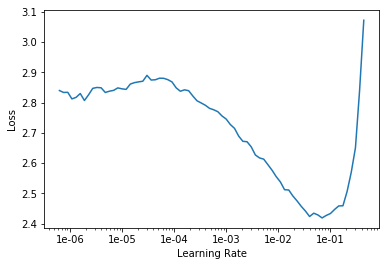

In [11]:
learn2.recorder.plot()

In [13]:
learn2.fit_one_cycle(20, 2e-2)

epoch,train_loss,valid_loss,accuracy
1,0.390411,0.191975,0.941071
2,0.325392,0.240465,0.925714
3,0.292676,0.165931,0.946548
4,0.271230,0.302595,0.908095
5,0.287368,0.190041,0.952024
6,0.327347,0.193559,0.945476
7,0.270688,1.472940,0.956309
8,0.288305,0.206884,0.940833
9,0.208354,0.115307,0.967619
10,0.187724,0.084934,0.975714


In [14]:
learn2.save('st1')

In [33]:
learn2.load('st1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (33600 items)
[Category 0, Category 1, Category 4, Category 0, Category 0]...
Path: data
x: ImageItemList (33600 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Valid: LabelList
y: CategoryList (8400 items)
[Category 3, Category 7, Category 1, Category 4, Category 3]...
Path: data
x: ImageItemList (8400 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), 

In [34]:
learn2.unfreeze()

In [35]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


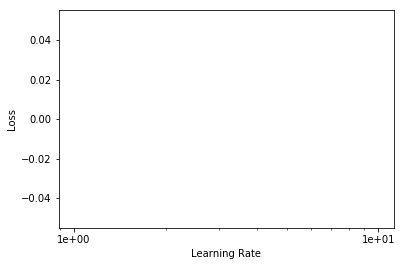

In [36]:
learn2.recorder.plot()

In [37]:
learn2.fit_one_cycle(20, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.060379,18.138765,0.984048
2,0.054071,3.298298,0.987024
3,0.055487,0.055287,0.987976
4,0.066293,0.909962,0.986786
5,0.051749,0.393736,0.988929
6,0.052138,0.041647,0.988095
7,0.054538,1.223408,0.989762
8,0.064802,0.035119,0.989881
9,0.044544,0.040861,0.990714
10,0.056269,0.034628,0.990595


In [38]:
learn2.save('st2')

In [39]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


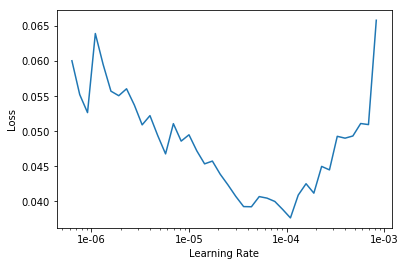

In [40]:
learn2.recorder.plot()

In [41]:
learn2.fit_one_cycle(20, slice(8e-5,2e-4))

epoch,train_loss,valid_loss,accuracy
1,0.046300,0.037095,0.989286
2,0.067342,0.045450,0.985952
3,0.086381,0.048530,0.984643
4,0.087651,0.038807,0.989524
5,0.100814,0.055872,0.982024
6,0.076405,0.048487,0.985000
7,0.079588,0.043634,0.987976
8,0.058406,0.042295,0.987143
9,0.051520,0.045281,0.986786
10,0.053149,0.033853,0.989048


In [44]:
submission_2 = pd.DataFrame({'ImageId' : [i + 1 for i in range(0, len(df_test))]})

In [48]:
submission_2['Label'] = [learn2.predict(i_to_img(i))[1].numpy().sum() for i in range(0, len(df_test)) ]

In [49]:
submission_2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [50]:
submission_2.to_csv('submission_res50.csv', index = False)

In [51]:
learn2.save('st3')